<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [33]:
##### Your Code Here #####
import numpy as np

np.random.seed(812)

# inputs for x1, x2, and x3
X = np.array(([0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [1, 1, 1],
              [0, 0, 0]), dtype=float)

# y or outputs
y = np.array(([0], [1], [1], [1], [1], [0], [0]), dtype=float)


In [34]:
X

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [35]:
y

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [36]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

class NeuralNetwork: 
    
    def __init__(self):
        # Setup Arch
        self.inputs = 3
        self.hiddenNodes = 4 
        self.outputNodes = 1
        
        # Initialize Weights
        # 3x4
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
        # 4x1
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weight Sum
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activation
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted Sum 2
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X,y,o):
        """
        Back prop thru the network
        """
        
        self.o_error = y - o
        
        # Apply derivative of sigmoid to error
        self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)
        
        # z2 error: how much were our output layer weights off
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # z2 delta: how much were the weights off?
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.hidden_sum)

        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [37]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [38]:
#from reference import NeuralNetwork

nn = NeuralNetwork()

nn.train(X,y)

In [39]:
#after one epoch
nn.o_error

array([[-0.79059631],
       [ 0.1882691 ],
       [ 0.31172473],
       [ 0.21765305],
       [ 0.33937005],
       [-0.71709499],
       [-0.75622518]])

In [40]:
# Train my 'net
nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.5388686 ]
 [0.55352047]
 [0.40771131]
 [0.55447957]
 [0.3955229 ]
 [0.42425304]
 [0.53465072]]
Loss: 
 0.2671788975685582
+---------EPOCH 2---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.56265718]
 [0.58384884]
 [0.43722821]
 [0.58154944]
 [0.42284887]
 [0.45815638]
 [0.55441205]]
Loss: 
 0.26170875194122345
+---------EPOCH 3---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.57710158]
 [0.60293305]
 [0.45817846]
 [0.59822237]
 [0.44202232]
 [0.48221773]
 [0.56557947]]
Loss: 
 0.2584939141317452
+---------EPOCH

In [41]:
#now can check 
nn = NeuralNetwork()
nn.train(X, y)
output = nn.feed_forward([1, 1, 1])
print("output", output)


####### HOW?????

output [0.79188012]


In [42]:
nn = NeuralNetwork()
nn.train(X, y)
output = nn.feed_forward([0, 0, 0])
print("output", output)




####### HOW?????

output [0.21542863]


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [72]:
##### Your Code Here #####

#MNIST in tensor flow iwth multilayer perceptron. Go through tutorial on that and see which digiti person handwrote between 0 and 9, make sure to use softmax activation at the end

In [87]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [88]:
# input the image dimensions
img_rows, img_cols = 28, 28

In [89]:
#split train and test sets with the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [90]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [91]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [92]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten

# Stretch - use dropout 
import numpy as np

In [93]:
# X Variable Types
num_classes = 10

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') /255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes) #keras encoding here
y_test = keras.utils.to_categorical(y_test, num_classes)

In [96]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #images for 2 dimensions (after number of observations for input shape)
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation="softmax")) #always last layer before compile model and only classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.fit(x_train, y_train, epochs=10, validation_data =(x_test, y_test) ) #helps monitor validation and training loss 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4886 - accuracy: 0.8638 - val_loss: 0.3017 - val_accuracy: 0.9139
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2989 - accuracy: 0.9157 - val_loss: 0.2876 - val_accuracy: 0.9208
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2770 - accuracy: 0.9222 - val_loss: 0.2787 - val_accuracy: 0.9203
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2650 - accuracy: 0.9250 - val_loss: 0.2718 - val_accuracy: 0.9256
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2569 - accuracy: 0.9276 - val_loss: 0.2580 - val_accuracy: 0.9276
Epoch 6/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2505 - accuracy: 0.9288 - val_loss: 0.2603 - val_accuracy: 0.9278
Epoch 7/10
60000/60000 [==============================] 

In [99]:
scores = model.evaluate(x_test,y_test)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

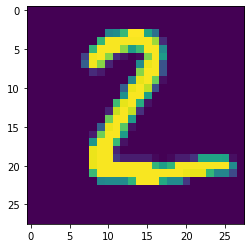

In [101]:
import matplotlib.pyplot as plt

plt.imshow(x_test[1])

In [103]:
model.predict(np.array([x_test[1]])) #0, 0, 1 so its the number 2

array([[2.2687882e-03, 3.4877425e-04, 9.8080474e-01, 7.5807195e-04,
        5.2809021e-16, 6.5933506e-05, 1.5689934e-02, 1.0809769e-17,
        6.3750515e-05, 8.6994028e-15]], dtype=float32)

In [104]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?